In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd
import plotly.express as px
import plotly
import numpy as np
import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
import os

In [3]:
df = pd.read_pickle('datas/df_data_nationales.pkl')
df2 = pd.read_pickle('datas/df_temperatures.pkl')

In [4]:
conso_nat = pd.DataFrame(df['Consommation'].dropna(axis=0).resample('M').mean())
conso_nat
conso_nat_2017 = conso_nat[conso_nat.index.year == 2017]
conso_nat_2017

Consommation
DateTime                
2017-01-31  76722.452285
2017-02-28  64894.846726
2017-03-31  57162.940860
2017-04-30  50595.241667
2017-05-31  46811.319892
2017-06-30  46050.253472
2017-07-31  45200.407930
2017-08-31  42810.442204
2017-09-30  46425.696528
2017-10-31  48875.329973
2017-11-30  62084.813889
2017-12-31  69141.551075

In [5]:
mean_temperature = df2.mean(axis=1).dropna()
mean_temperature_resample = mean_temperature.resample('M').mean()
mean_temperature_df = pd.DataFrame(mean_temperature_resample, columns=['avg_temperature'])
mean_temperature_2017 = mean_temperature_df[mean_temperature_df.index.year == 2017]
mean_temperature_2017

avg_temperature
date_validite                 
2017-01-31            2.523148
2017-02-28            7.543220
2017-03-31           10.370933
2017-04-30           11.020961
2017-05-31           15.959390
2017-06-30           20.566036
2017-07-31           20.762329
2017-08-31           20.546560
2017-09-30           15.457746
2017-10-31           14.134665
2017-11-30            7.544006
2017-12-31            5.480193

In [6]:
merge_conso_temperature = conso_nat_2017.merge(mean_temperature_2017, how='inner', left_index=True, right_index=True)
merge_conso_temperature

Consommation  avg_temperature
DateTime                                 
2017-01-31  76722.452285         2.523148
2017-02-28  64894.846726         7.543220
2017-03-31  57162.940860        10.370933
2017-04-30  50595.241667        11.020961
2017-05-31  46811.319892        15.959390
2017-06-30  46050.253472        20.566036
2017-07-31  45200.407930        20.762329
2017-08-31  42810.442204        20.546560
2017-09-30  46425.696528        15.457746
2017-10-31  48875.329973        14.134665
2017-11-30  62084.813889         7.544006
2017-12-31  69141.551075         5.480193

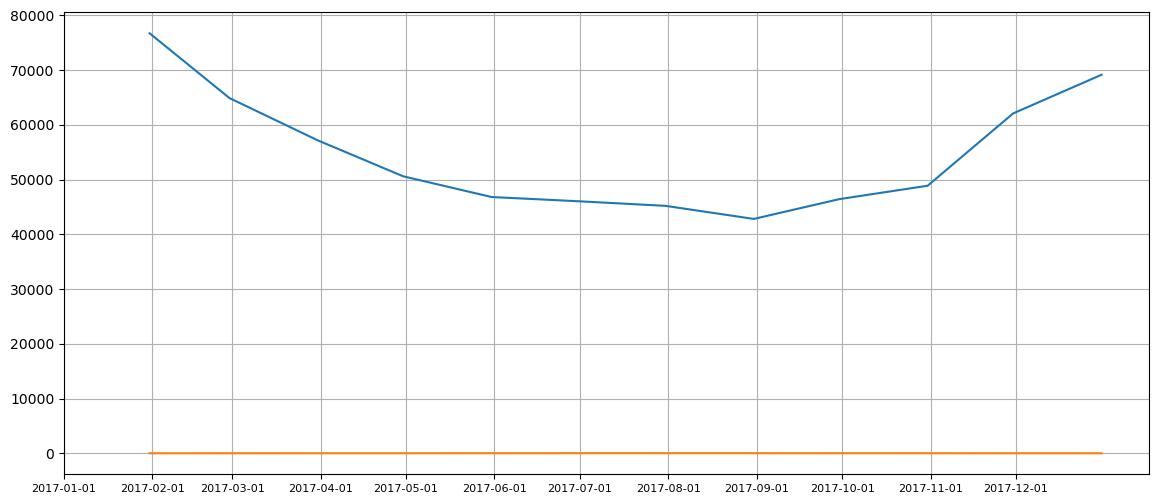

In [7]:
dates = ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',	'2017-10',	'2017-11', '2017-12']
plt.figure(figsize = (14, 6))
plt.plot(merge_conso_temperature)
plt.xticks(dates,fontsize = 8)
plt.grid(True)
plt.show()


/tmp/ipykernel_13566/1720955126.py:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(reg.predict(X), labels = mylabels )


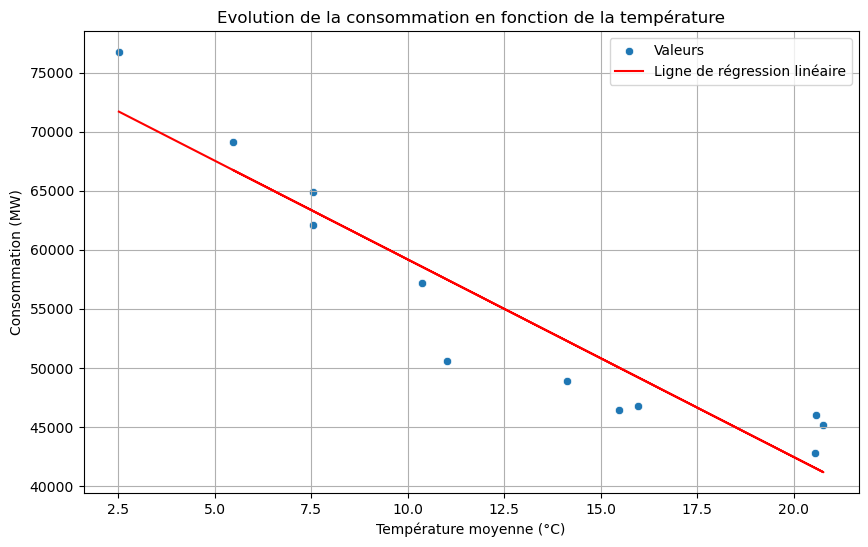

In [13]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
data = {
    'DateTime': [
        '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', 
        '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', 
        '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'
    ],
    'consommation': [
        76722.452285, 64894.846726, 57162.940860, 50595.241667, 
        46811.319892, 46050.253472, 45200.407930, 42810.442204, 
        46425.696528, 48875.329973, 62084.813889, 69141.551075
    ],
    'avg temperature': [
        2.523148, 7.543220, 10.370933, 11.020961, 
        15.959390, 20.566036, 20.762329, 20.546560, 
        15.457746, 14.134665, 7.544006, 5.480193
    ]
}

df = pd.DataFrame(data)
df['DateTime'] = pd.to_datetime(df['DateTime'])
mylabels = ['Valeurs', 'Ligne de régression linéaire']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['avg temperature'], y=df['consommation'])
plt.title('Evolution de la consommation en fonction de la température')
plt.xlabel('Température moyenne (°C)')
plt.ylabel('Consommation (MW)')

# Ajouter une ligne de régression linéaire
X = df['avg temperature'].values.reshape(-1, 1)
y = df['consommation'].values
reg = LinearRegression().fit(X, y)
plt.plot(df['avg temperature'], reg.predict(X), color='red')
plt.legend(reg.predict(X), labels = mylabels )
plt.grid(True)
plt.show()


#sensitivity = reg.coef_[0]
#print(f"Sensibilité thermique : {sensitivity:.2f} MW/°C")


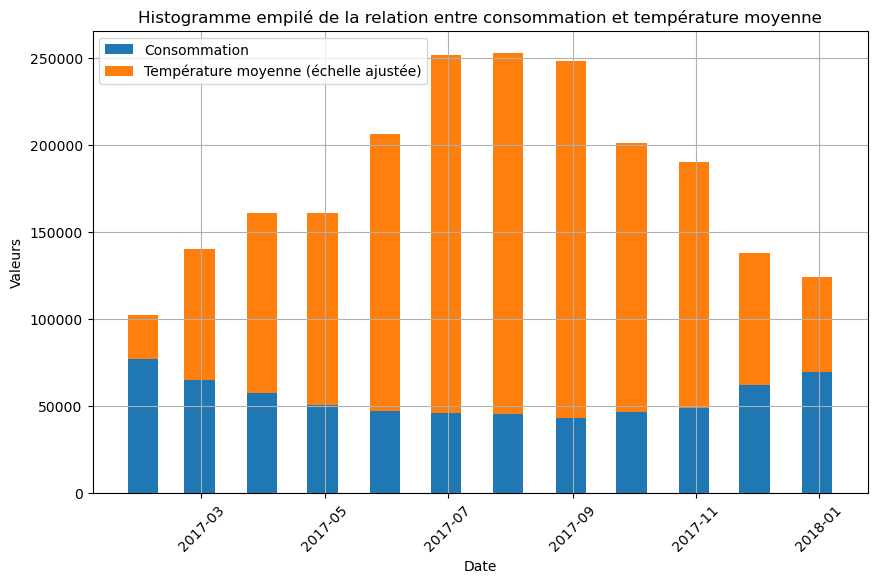

In [15]:



data = {
    'DateTime': [
        '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', 
        '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', 
        '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'
    ],
    'consommation': [
        76722.452285, 64894.846726, 57162.940860, 50595.241667, 
        46811.319892, 46050.253472, 45200.407930, 42810.442204, 
        46425.696528, 48875.329973, 62084.813889, 69141.551075
    ],
    'avg temperature': [
        2.523148, 7.543220, 10.370933, 11.020961, 
        15.959390, 20.566036, 20.762329, 20.546560, 
        15.457746, 14.134665, 7.544006, 5.480193
    ]
}

df = pd.DataFrame(data)
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Tracer l'histogramme empilé avec des barres épaisses
plt.figure(figsize=(10, 6))
width = 15  # Largeur des barres

plt.bar(df['DateTime'], df['consommation'], width=width, label='Consommation')
plt.bar(df['DateTime'], df['avg temperature'] * 10000, bottom=df['consommation'], width=width, label='Température moyenne (échelle ajustée)')

plt.title('Histogramme empilé de la relation entre consommation et température moyenne')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
